# What?

### To go directly to the tag hierarchy and the results: [click here](#tag_hierarchy)

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('../../data/papersummaries_cleaned.csv')

NB: Because 'validate' is also used for the meta studies (validation of some procedure), we will need to remove 'bad tags' later (just one of the many reasons why using 'validation' as a research method category is unwise...).

### The Tagging Rules

* The tagging rules are the result of an iterative-exploratory, interactive coding process undergone by a non-expert.
* The tags are designed to characterize the papers from different perspectives, but only insofar as the paper characteristics are represented verbally in the one-sentence paper summaries.
* The tagging system - what I call a **facet forest** - is a synthesis of
  - (semi-)official **practical RE bodies of knowledge** as contained in, e.g., the SWEBOK, ISO/IEC/IEEE Standards, IREB Certification Syllabi (e.g., CPRE Foundations)
  - **literature** containing advice on taxonomy-building in RE and SE or examples of RE taxonomies (including the attempt to structure the field in the context of the NaPiRE initiative), reviewed 'manually'
  - the 'semi-controlled' vocabulary used to formulate the **one-sentence summaries** for the RE-Pract survey
* The tagging rules, at this point, are most certainly overfitting the one-sentence summaries they were built to classify, and they are very likely over-inclusive; therefore, manual review should not only check the tags but also suggest amendments to the rules creating the tags.


#### By the phase in the requirements process

In [3]:
def assign_phase(summary):
    level_1 = ':phase'
    
    level_2 = [':elicitation', ':analysis', ':specification', ':evaluation', ':management']
    
    level_3 = {':elicitation': ['elicit', 'discover', 'brainstorm', 'identify\snew\sreq'], 
               ':analysis':    ['analy[sz]ing\srequirements', 'requirements\sanalysis', 'requirements\scategoriz',
                                'negotia', 'conflicting\sreq', '\srelations\s', 'interaction between requirements'], 
               ':specification': ['requirements?\sspec', 'specify'],
               ':evaluation':  ['verif', 'validat', 'esting.*?(?!hypothes)', 
                                'test\sstatus', 'requirements?\sreview', 'review.*?requirements'],
               ':management':  ['maint[ae]', '\sadapt', '[ -]reus[ei]', 'continuous', 
                                '\schange', 'recover', '\sevolution|\sevolv[ei]', 
                                'monitor', 'runtime', 'requirements?\smanage',
                               ]
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

#### Information to be Documented

*Question: In the literature, we find the distinction functional requirements, quality requirements, constraints. So far, we only have a separate category for quality requirements.
Do we want to use the other categories, too? If so, how would we group the remaining 'information' items under the headings?*

In [4]:
def assign_quality(summary):
    level_1 = ':information:quality'
    
    level_2 = ['_compatibility', '_maintainability', '_performance', '_portability', 
               '_reliability', '_safety', '_security', '_usability', '_sustainability',
               '_all']
    
    level_3 = {'_compatibility':   ['compatib'], 
               '_maintainability': [], # what could possibly go here?
               '_performance':     ['performance', 'response\stime'],
               '_portability': ['portab'],
               '_reliability': ['reliab', 'dependab'],
               '_safety':      ['safety\s'],
               '_security':    ['secur', 'privac'],
               '_usability':   ['usability'],
               '_sustainability': ['sustainability'],
               '_all': ['quality\sreq', 'non-functional']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [5]:
def assign_information(summary):
    level_1 = ':information'
    
    level_2 = [':architecture', ':goals', ':systembehavior', 
               ':functional', ':scenarios', ':rules']
    
    level_3 = {':architecture': ['architect(?:ural|ing)'],
               ':goals': ['stakeholder\sgoals', 'goal-orient'], 
               ':systembehavior': ['behaviou?ral\sreq'],
               ':functional': ['\sfunctional\sreq', 'product.{1,10}req', 'functionality'],
               ':scenarios': ['scenario'],
               ':rules': ['\srule']
               }
    
    return assign_tag(level_1, level_2, level_3, summary) + assign_quality(summary)

#### Requirements Documentation Types

*Question: Should we further distinguish between Natural Language, Conceptual Model, and Hybrid Techniques (plus the general 'artifact' category)?*

In [6]:
def assign_documentation(summary):
    level_1 = ':documentation'
    
    level_2 = [':artifacts', 
               ':diagrams', ':businessmodels', ':goalmodels', ':featuremodels',
               ':statemachines', ':prototypes', ':usecases', 
               ':naturallanguage', ':userstories']
    
    level_3 = {':artifacts':      ['artifact'], # applicable if the term artifact is mentioned without more detail
               ':diagrams':       ['diagram', '(?<!)uml(?!\w)'], 
               ':businessmodels': ['business\s(process\s)?models?'], 
               ':goalmodels':     ['goal\smodel', 'i\*'],
               ':featuremodels':  ['feature(?:\-orient ed)?\smodel', 'model.*?product',
                                   'requirements composition tables'],
               ':statemachines':  ['state\smachine'],
               ':naturallanguage':['natural\slanguage', '[- ]words?', '[- ]text'],
               ':prototypes':     ['prototyp'],
               ':usecases':       ['use[- ]case'],
               ':userstories':    ['user[- ]stories'],
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [7]:
def assign_challenge_content(summary):
    level_1 = ':challenge:content'
    
    level_2 = ['_unambiguousness', '_consistency', 
               '_feasibility', '_traceability', 
               '_completeness', '_understandability',
               '_all'
              ]
    
    level_3 = {'_unambiguousness': ['ambigu', 'clarif', 'vague'],
               '_consistency':     ['inconsisten'],
               '_feasibility':     ['realizab', 'feasib'],
               '_traceability':    ['\strac[ei]', 'linking', 'requirements?\sdependency'],
               '_completeness':    ['completeness', 'incomplete', 
                                    'insufficient', 'missing\srequire', 'scope\screep'],
               '_understandability': ['understandability', 'comprehens(?:ion|ibility)', 
                                      '\sreadab','complicat', 
                                      '(?<!for)(?<!on)(?<!domain)\sunderstanding'],
               '_all': ['requirements?\sdefect', 'requirements?\serror', 'inadeq']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [8]:
def assign_challenge_people(summary):
    level_1 = ':challenge:people'
    
    level_2 = ['_communication', '_collaboration', '_subjectivity', '_skills'
              ]
    
    level_3 = {'_communication': ['communica', 'misunderst', 'feedback', 
                                  'exchanging\sreq'],
               '_collaboration': ['collabor'],
               '_subjectivity':  ['perce(?:pti|iv)', 'belie[fv]', 'subjectiv'],
               '_skills':        ['educat', '(?<!machine\s)learning', 'skills', '\sread\s',
                                  'teaching', 'creativ', '\sjobs?\s', 'training']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [9]:
def assign_challenge_process(summary):
    level_1 = ':challenge:process'
    
    level_2 = ['_automation', '_formalization', '_standardization',
               '_prioritization', '_visualization', '_deciding', '_improving'
              ]
    
    level_3 = {'_automation':      ['automat(?:ic|ion|ing|es|e)'],
               '_formalization':   ['formaliz', 'informal'],
               '_prioritization':  ['priorit', 'preferred'],
               '_standardization': ['standardiz', 'template', 'reus[ea]', 'blueprint'],
               '_visualization':   ['visual'],
               '_deciding':        ['decision[- ]making', 'decide(?!d)', 'decisions?\sprobl',
                                    '(?<!\w)re\sdecision'],
               '_improving':       ['improv'] 
               # improving included to see if mention of word stem makes a difference
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [10]:
def assign_challenge_context(summary):
    level_1 = ':challenge:context'
    
    level_2 = ['_uncertainty', '_regulation']
    
    level_3 = {'_uncertainty':   ['uncertain', '\srisk'],
               '_regulation':    ['regulat[io]', 'jurisdict', 'legal', 
                                  'compliance\s(?!with)','\sethic']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [11]:
def assign_all_challenges(summary):
    level_1 = ':challenge'
    level_2 = [':failure', ':problem']
    level_3 = {':failure': ['failure', 'failed', 'unsatisf'],
               ':problem': ['problem']
               # problem included to see if mention of word stem makes a difference
              }    
    return (assign_tag(level_1, level_2, level_3, summary)
            + assign_challenge_content(summary) 
            + assign_challenge_people(summary) 
            + assign_challenge_process(summary) 
            + assign_challenge_context(summary))

#### Scope Restriction: Domain
* Class of System
* System Sector
* Organizational Factors

In [12]:
def assign_domain_class(summary):
    level_1 = ':domain:systemclass'
    
    level_2 = ['_embedded', '_safetycritical', '_adaptive', '_complex', '_bi']
    
    level_3 = {'_embedded':   ['embedded\ssystem'],
               '_bi':         ['enterprise\ssystem'], # business intelligence
               '_safetycritical': ['safety[ -]critical'],
               '_adaptive':   ['adaptive\ssystem'],
               '_complex':    ['complex.*?system'],
               '_opensource': ['open\ssource'],
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [13]:
def assign_domain_sector(summary):
    level_1 = ':domain:sector'
    
    level_2 = ['_automotive', '_subsea', '_mobile', '_media', '_it', '_health', '_public',
               '_energy', '_nanotechnology', '_supplier']
    
    level_3 = {'_automotive': ['automotive'],
               '_subsea':     ['subsea'],
               '_mobile':     ['mobile'],
               '_media':      ['entertainment', '\sgames?'],
               '_it':         ['\sweb\W', '(?<!\w)it\scompany'],
               '_health':     ['health', 'medicine', '\sinjur(?:y|ies)'],
               '_public':     ['police', 'public\s(?:sector|admin)', 'governa?ment'],
               '_energy':     ['energy'],
               '_nanotechnology': ['nano\s?\-?technology'],
               '_supplier':   ['suppl']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [14]:
def assign_domain_organization(summary):
    level_1 = ':domain:organization'
    
    level_2 = ['_distributed', '_agile', '_outsourced', '_lean']
    
    level_3 = {'_distributed': ['\sdistributed\s', 'distance'],
               '_agile':       ['\sagile\s'],
               '_lean':        ['\slean\s'],
               '_outsourced':  ['outsourced\sproj']
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

In [15]:
def assign_all_domains(summary):
    return (assign_domain_class(summary) 
            + assign_domain_sector(summary) 
            + assign_domain_organization(summary))

#### Scope Restriction: Regional

In [16]:
def assign_region(summary):
    level_1 = ':region'
    
    # the continents are stubs, the countries mentioned were found during data exploration
    level_2 = [':continent_europe', ':continent_asia', ':continent_namerica', 
               ':continent_samerica', ':continent_africa', ':continent_australia',
               ':country_finland', ':country_china'
              ]
    
    level_3 = {x:[] for x in level_2}
    
    level_3[':country_finland'] = ['finland']
    level_3[':country_china'] = ['china']
    
    return assign_tag(level_1, level_2, level_3, summary)

#### Meta Papers need a place to go, too...

In [17]:
def assign_general(summary):
    level_1 = ':general'
    
    level_2 = [':research', ':terminology', ':framework']
    
    level_3 = {':research': ['literature.*?research', 'threats\sto\svalidity', 
                             'research\sproject'],
               ':terminology': [], # what could possibly go here? is there even a need for this category?
               ':framework': ['conceptual framework', 'persona-centric.*?framework'],
               }
    
    return assign_tag(level_1, level_2, level_3, summary)

#### Functions to put everything together...

In [18]:
def assign_tag(level_1, level_2, level_3, summary):
    tags = []
    for tag in level_2:
        if summary:
            if any([re.search(keyword, summary) for keyword in level_3[tag]]):
                tags.append(level_1+tag)
        else: # i.e., summary is set to the empty string, as deliberately in build_taxonomy (see below)
            tags.append(level_1+tag)
    return tags

In [19]:
def add_split_tags(longform_tags):
    tags_four_levels = list(zip(*[x.split(':') for x in longform_tags.Tag]))
    longform_tags['level_1'] = tags_four_levels[0]
    longform_tags['level_2'] = tags_four_levels[1]
    longform_tags['level_3'] = [x.split('_')[0] for x in tags_four_levels[2]]
    longform_tags['level_4'] = [x.split('_')[-1] if (len(x.split('_')) > 1) 
                                                        else '' for x in tags_four_levels[2]]
    return longform_tags

In [20]:
def assign_all_what(summary):
    summary = summary.lower()
    tags = ['what'+ x for x in 
            (
                assign_phase(summary)
                + assign_information(summary)
                + assign_documentation(summary)
                + assign_all_challenges(summary)
                + assign_domain_class(summary)
                + assign_domain_sector(summary)
                + assign_domain_organization(summary)
                + assign_region(summary)
                + assign_general(summary)
            )]
    return tags

#### Post-Processing

In [21]:
def create_longform_tags(df, column_numbers):
    longform_tags = pd.DataFrame(columns=['PaperID', 'Tag'])
    for row in df.iterrows():
        for colno in column_numbers:
            longform_tags = longform_tags.append(
                pd.DataFrame({'PaperID':list(len(row[1][colno])*[row[1][0]]), 'Tag':row[1][colno]}))
    return longform_tags.reset_index().drop('index', axis=1)

In [22]:
def split_tag_levels(df, level_4=False):
    longform_tags = pd.DataFrame(df, copy=True)
    tags_three_levels = list(zip(*[x.split(':') for x in longform_tags.Tag]))
    longform_tags['level_1'] = tags_three_levels[0]
    longform_tags['level_2'] = tags_three_levels[1]
    if level_4:
        split_level_3 = [x.split('_') for x in tags_three_levels[2]]
        longform_tags['level_3'] = [x[0] for x in split_level_3]
        longform_tags['level_4'] = [x[-1] if (len(x) > 1) else '' for x in split_level_3]
    else: 
        longform_tags['level_3'] = tags_three_levels[2]
    return longform_tags

#### Helpers for Iterative-Exploratory Rule Development 

In [23]:
def helper(regex):
    res = [x for x in df.PaperSummary if re.search(regex, x.lower())]
    return (len(res), res)

def give(loc):
    return df.PaperSummary[loc]

def match(loc):
    summary = give(loc)
    return (summary, assign_all_what(summary))

#### For concept retrieval

In [24]:
def build_taxonomy(list_only=False):
    """Retreive a DataFrame or a list of all possible tags in the taxonomy."""
    tag_list = assign_all_what('')
    if list_only:
        return tag_list
    else:
        df = pd.DataFrame({'Tag':tag_list}) 
        return add_split_tags(df)

## Work happens here

In [25]:
helper('artifact') # example of how we can quickly get the matches for a specific word/regex

(14,
 ['A method for automatically recovering software traceability links between various software artifacts based on topic modelling (requirements, design, code, bug reports, test cases)',
  "A method for defining efficiently trace links among business application artifacts in order to decrease the developer's workload for setting trace links",
  'A solution for recommending trace links while creating or modifying traceable artifacts in order to avoid trace link creation towards the end of a project.',
  'An experiment with students to understand how requirements analysts seek and gather information when linking requirements to other software artifacts',
  'A method for recovering traceability links between software artifacts that can be configured at runtime in order to optimize trace quality',
  'An experience report on the use of domain analysis to characterize current practice of applying requirement-based test generation at one industry partner in order to enhance the reuse of te

#### Creating all the tags

In [26]:
df['what'] = [assign_all_what(x) for x in df.PaperSummary]

In [27]:
df.head()

,PaperID,PaperSummary,what
0,1,A method for automatically recovering software...,"[what:phase:management, what:documentation:art..."
1,2,A set of two techniques for improving the qual...,"[what:information:functional, what:challenge:c..."
2,3,A case study on evaluating a given technique f...,[what:challenge:process_prioritization]
3,4,An experience report on the development of a m...,"[what:phase:evaluation, what:challenge:process..."
4,5,A document-driven study on the relevancy of cl...,[what:phase:specification]


Summaries without tags?

In [28]:
len([(x[0], x[1][1], x[1][2]) for x in df.iterrows() if len(x[1][2]) < 1])

4

In [29]:
[(x[0], x[1][1], x[1][2]) for x in df.iterrows() if len(x[1][2]) < 1]

[(119,
  'A literature study on understanding the strengths and weaknesses of service description methods in order to allow developers selecting an appropriate description method that fits best their services',
  []),
 (330,
  'A case study for evaluating a particular approach to release planning in order to reach the market as early as possible with a competitive level of quality.',
  []),
 (335,
  'A method for modeling and reasoning about information quality at requirements level in order to avoid low-quality information for critical systems.',
  []),
 (350,
  'A data-driven study for comparing several probabilistic techniques to classify app reviews from app stores in order to assess their accuracy.',
  [])]

### Putting all tags in a long-form DataFrame

In [30]:
longform_tags = create_longform_tags(df, [2])
longform_tags.head()

,PaperID,Tag
0,1,what:phase:management
1,1,what:documentation:artifacts
2,1,what:challenge:content_traceability
3,1,what:challenge:process_automation
4,2,what:information:functional


In [31]:
longform_tags_split = split_tag_levels(longform_tags, level_4=True)

In [32]:
longform_tags_split.shape

(842, 6)

In [33]:
longform_tags_merged = df[['PaperID', 'PaperSummary']].merge(longform_tags, how='outer')
# this sorts the PaperIDs without Tags to the end
longform_tags_merged = longform_tags_merged[~longform_tags_merged.Tag.isna()
                                           ].append(longform_tags_merged[longform_tags_merged.Tag.isna()])

In [34]:
longform_tags_merged.to_csv('../../analysis/papermapping/papertags_what_forcorrection.csv', 
                            index=False, sep=';')

### Now, what do we get?

In [37]:
%matplotlib notebook
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style('darkgrid')

<IPython.core.display.Javascript object>


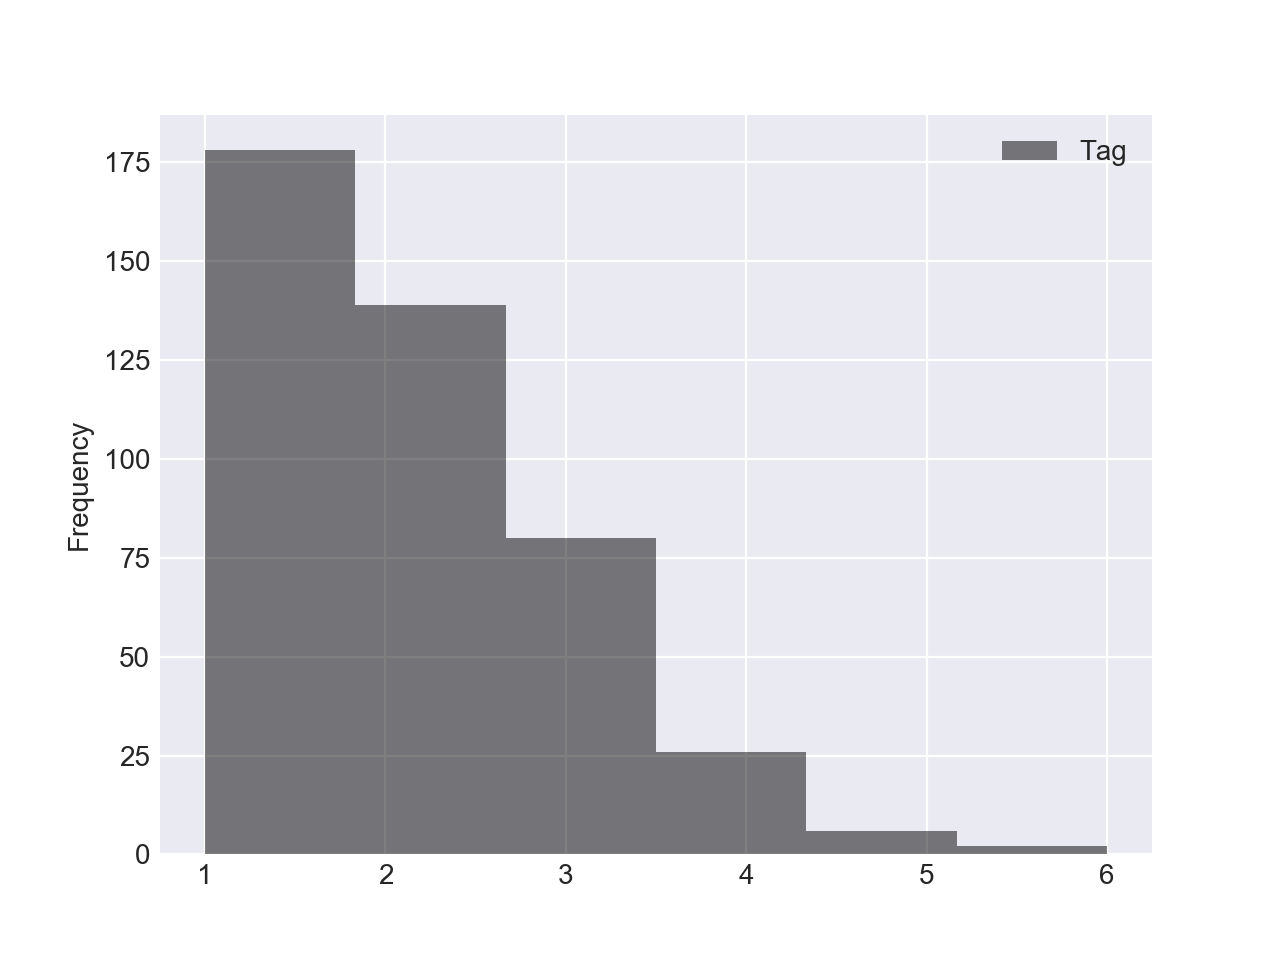

In [38]:
longform_tags.groupby('PaperID').count(
)[['Tag']].sort_values('Tag', ascending=False).plot.hist(bins=6, color='k', alpha=0.5)

#### What tags were assigned most often?

In [39]:
longform_tags_split.groupby(['level_1', 'level_2', 'level_3', 'level_4']).count()[['PaperID']
].sort_values('PaperID', ascending=False).head(10)

PaperID
level_1 level_2       level_3         level_4              
what    phase         management                         69
        challenge     process         automation         47
        phase         elicitation                        45
        challenge     content         traceability       43
        documentation naturallanguage                    42
        challenge     process         improving          36
        phase         evaluation                         35
        challenge     context         uncertainty        28
        phase         specification                      27
        information   quality         security           26

<a id='tag_hierarchy'></a>
## The Tag Hierarchy (tags assigned at least once only) - in Two Parts

### Part 1

In [40]:
longform_tags_split.groupby(['level_1', 'level_2', 'level_3', 'level_4']).count()[['PaperID']
].head(32)

PaperID
level_1 level_2       level_3         level_4                   
what    challenge     content         all                      5
                                      completeness            13
                                      consistency              8
                                      feasibility              4
                                      traceability            43
                                      unambiguousness         18
                                      understandability       15
                      context         regulation              23
                                      uncertainty             28
                      failure                                  9
                      people          collaboration            9
                                      communication           20
                                      skills                  16
                                      subjectivity             9
                      problem                                 14
                      process         automation              47
                                      deciding                11
                                      formalization            4
                                      improving               36
                                      prioritization          16
                                      standardization         17
                                      visualization           12
        documentation artifacts                               14
                      businessmodels                           1
                      diagrams                                 4
                      featuremodels                           11
                      goalmodels                               7
                      naturallanguage                         42
                      prototypes                               1
                      statemachines                            1
                      usecases                                11
                      userstories                              4

### Part 2

In [41]:
longform_tags_split.groupby(['level_1', 'level_2', 'level_3', 'level_4']).count()[['PaperID']
].tail(41)

PaperID
level_1 level_2     level_3        level_4                
what    domain      organization   agile                11
                                   distributed           3
                                   lean                  2
                                   outsourced            1
                    sector         automotive            4
                                   energy                2
                                   health                4
                                   it                    5
                                   media                 6
                                   mobile                4
                                   nanotechnology        1
                                   public                4
                                   subsea                1
                                   supplier              3
                    systemclass    adaptive              6
                                   bi                    1
                                   complex               1
                                   embedded              2
                                   safetycritical        5
        general     framework                            2
                    research                             6
        information architecture                         6
                    functional                          12
                    goals                                6
                    quality        all                  17
                                   performance           9
                                   reliability           2
                                   safety                6
                                   security             26
                                   sustainability        3
                                   usability             2
                    rules                                4
                    scenarios                            6
                    systembehavior                       3
        phase       analysis                            15
                    elicitation                         45
                    evaluation                          35
                    management                          69
                    specification                       27
        region      country        china                 1
                                   finland               1

<IPython.core.display.Javascript object>


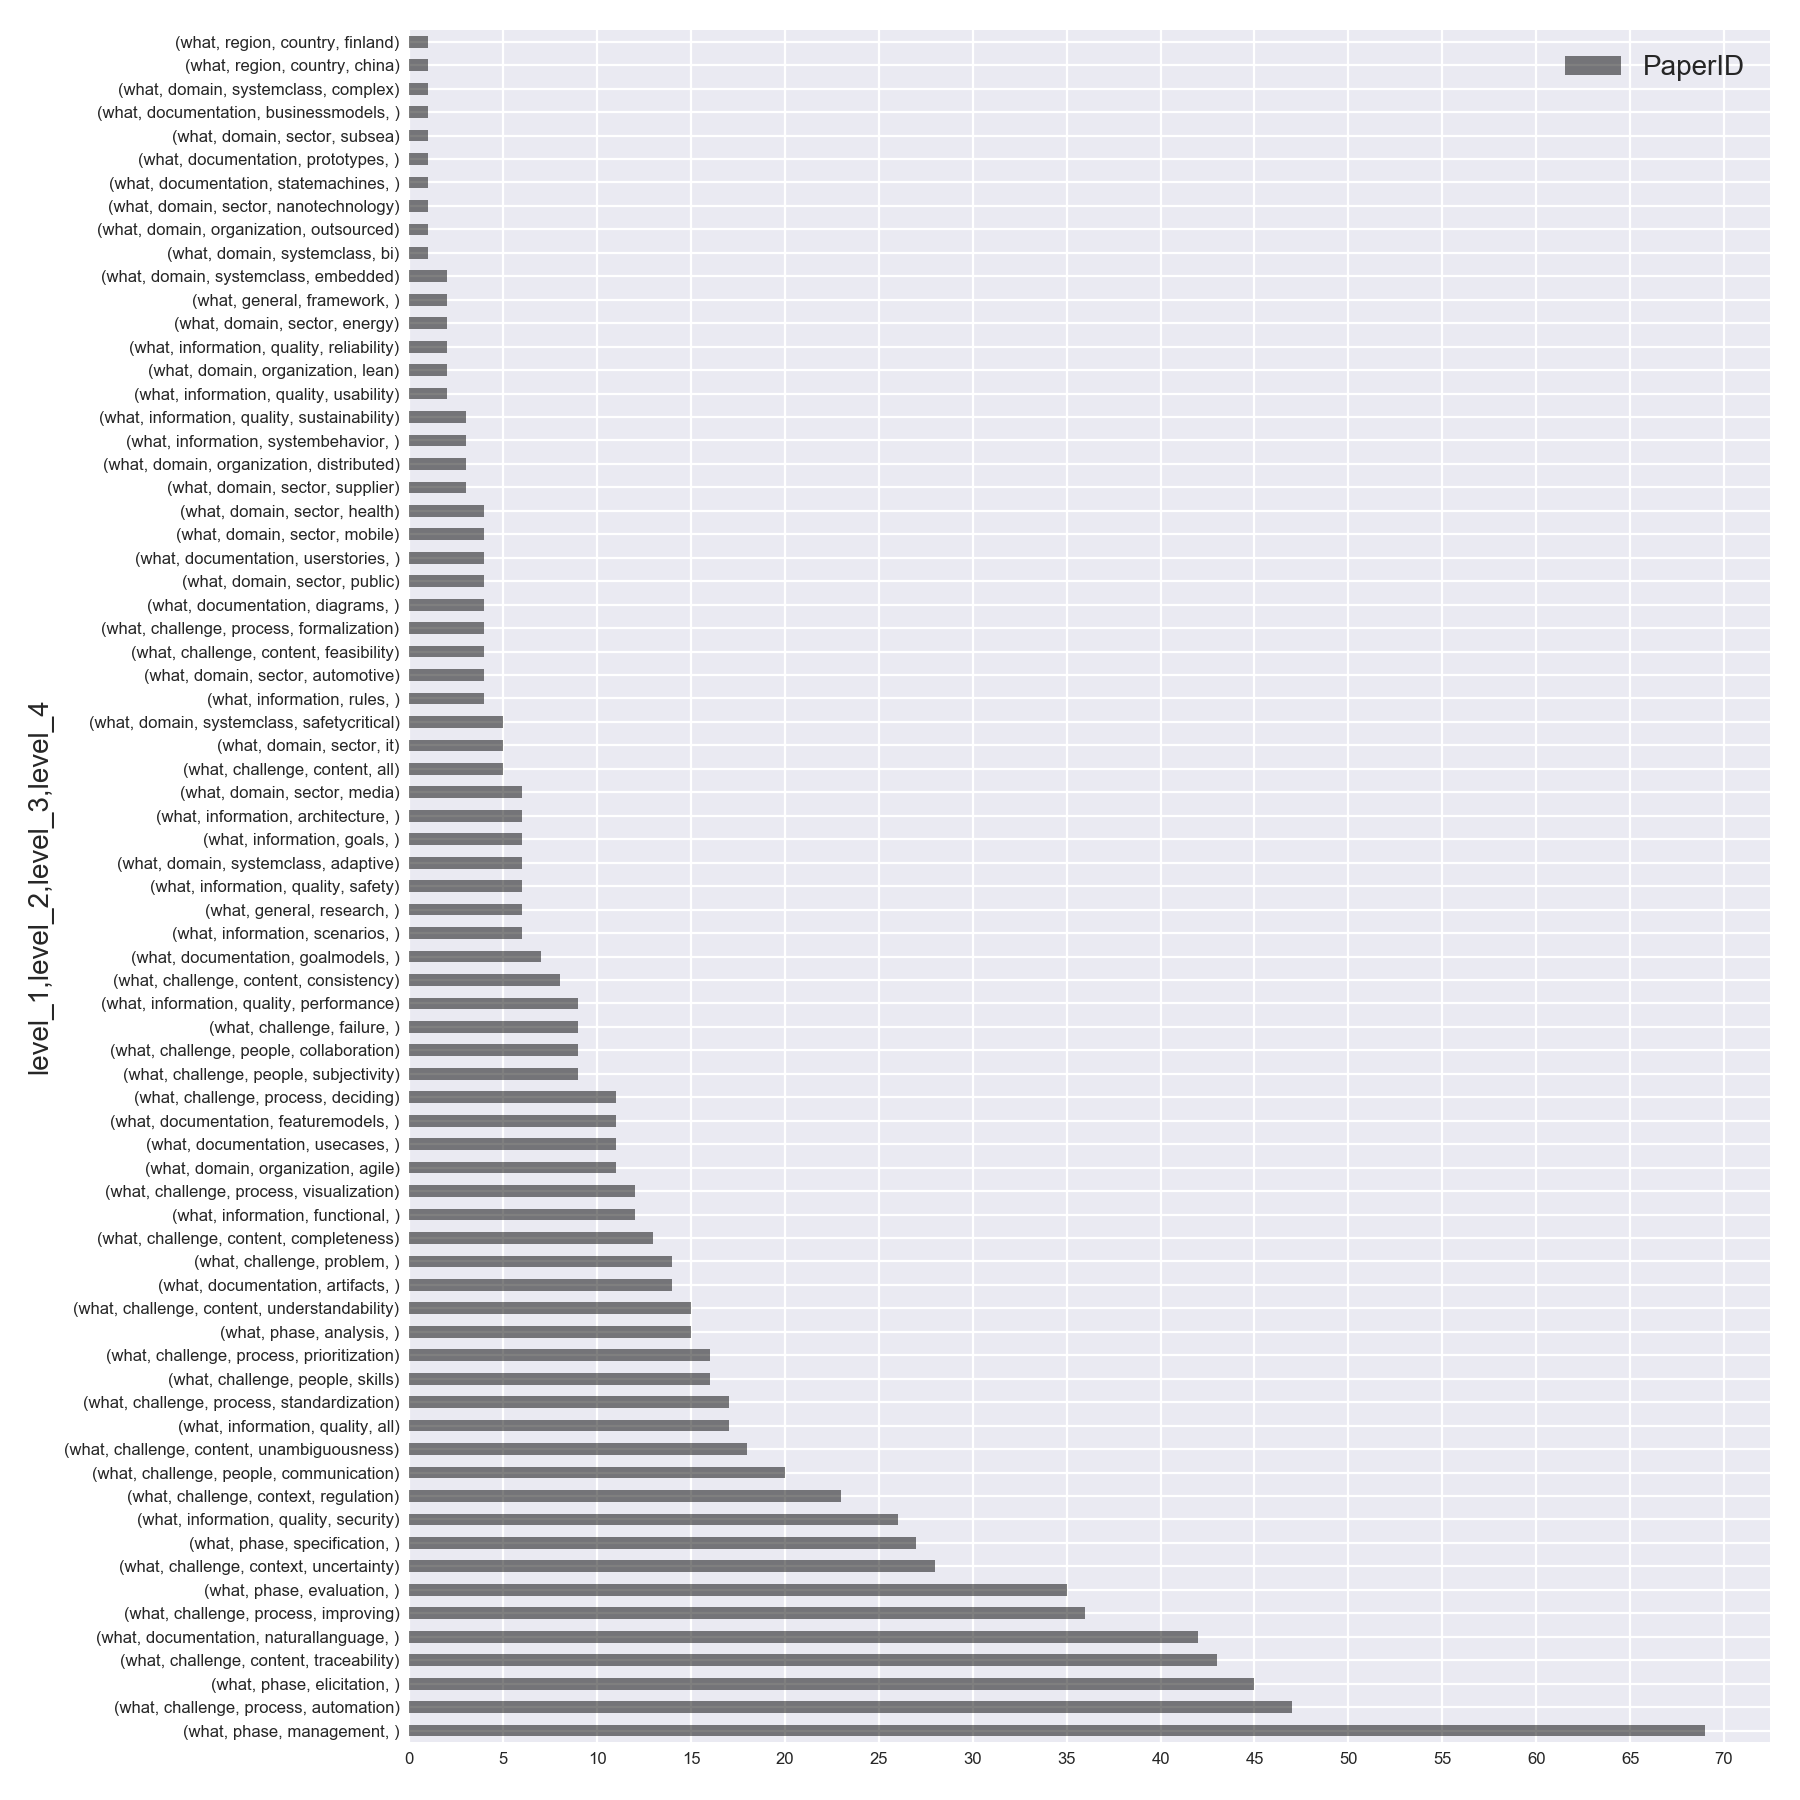

In [42]:
longform_tags_split.groupby(['level_1', 'level_2', 'level_3', 'level_4']).count()[['PaperID']
].sort_values('PaperID', ascending=False).plot.barh(stacked=True, fontsize=6, figsize=(9,9), color='k', alpha=0.5)
plt.xticks(range(0,71,5))
plt.tight_layout()

In case we want to inspect some counts:

In [43]:
#longform_tags_split.groupby(['level_1', 'level_2', 'level_3', 'level_4']).count()[['PaperID']
#].to_csv('../../analysis/papermapping/papertags_what_counts.csv', index=True)

In [44]:
#longform_tags_split.groupby(['level_1', 'level_2', 'level_3', 'level_4']).count()[['PaperID']
#].sort_values('PaperID', ascending=False
#             ).to_csv('../../analysis/papermapping/papertags_what_counts_sorted.csv', index=True)

The End.